In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data=pd.read_csv("df_encoded.csv")

[Text(0.5, 1.0, 'Top 5 Data Breach Types')]

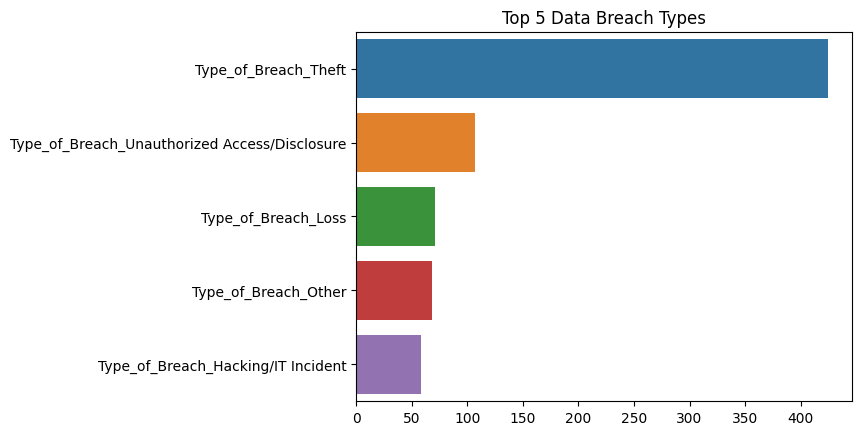

In [15]:
#RANK TOP 5 Data Breach Types

breach_type=data.loc[:,"Type_of_Breach_Hacking/IT Incident":"Type_of_Breach_Unauthorized Access/Disclosure"].sum().sort_values(ascending=False).head()

sns.barplot(x = breach_type.values, y = breach_type.index).set(title="Top 5 Data Breach Types")


[Text(0.5, 1.0, 'Top 5 Data Breach Locations')]

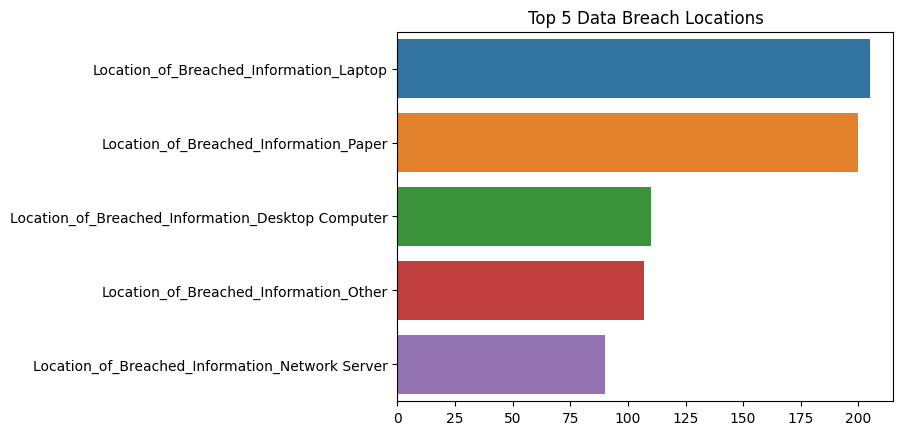

In [17]:
# Rate top 5 location types

location=data.loc[:,"Location_of_Breached_Information_Desktop Computer":].sum().sort_values(ascending=False).head()
sns.barplot(x = location.values, y = location.index).set(title="Top 5 Data Breach Locations")



[Text(0.5, 1.0, 'Top 20 States Affected by Data Breaches')]

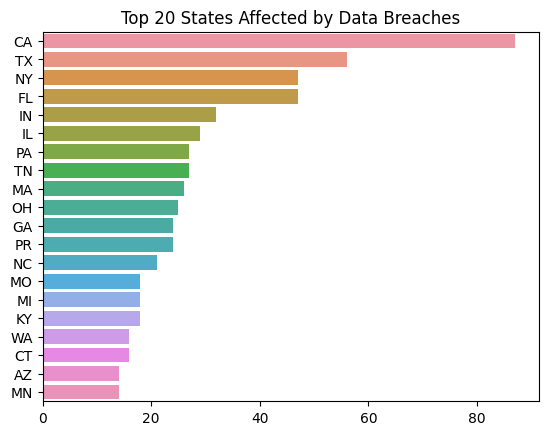

In [25]:
#Individuals affected per State
top_states=data["State"].value_counts().head(20)

sns.barplot(x = top_states.values, y = top_states.index).set(title="Top 20 States Affected by Data Breaches")

[Text(0.5, 1.0, 'Top 20 Companies Affected')]

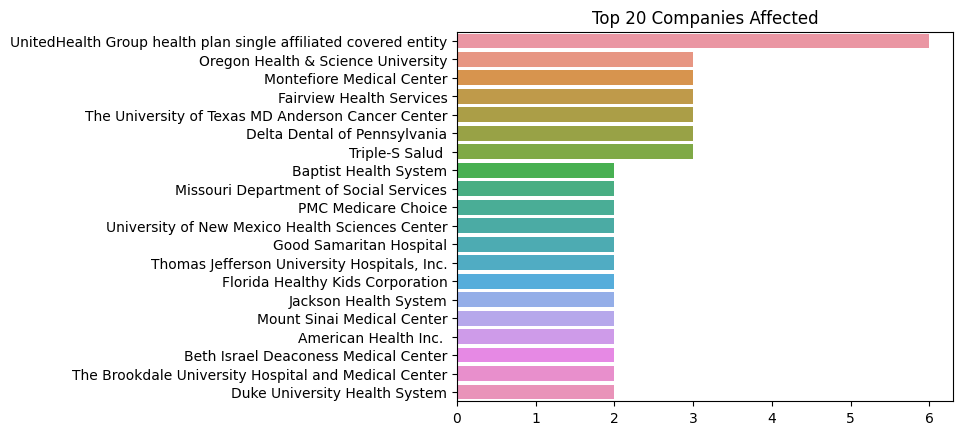

In [23]:
#top 20 companies to be affected
top_companies=data["Name_of_Covered_Entity"].value_counts().head(20)

sns.barplot(x = top_companies.values, y = top_companies.index).set(title="Top 20 Companies Affected")